# Bellabeat Case Study using R

### **Introduction**
This case study is based on the Bellabeat Company,a forward-thinking company specializing in high-tech health products. Through the collection of data on activity, sleep patterns, stress levels, and reproductive health, Bellabeat has been instrumental in equipping women with valuable insights into their own health and lifestyle habits.

### **Business task**

Examine data from smart devices to understand consumers' usage patterns effectively. Utilize insights and analysis derived from this data to formulate recommendations aimed at developing a robust marketing strategy for the company.

### **Ask**
#### **Key stakeholders**
**Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer.  
**Sando Mur**:Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.


#### **Questions for analysis**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### **Prepare**
The data being used for the case study is [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.


**Installing the required R packages**

In [1]:
#Define function
mypack <- function(package){
  new.package <- package[!(package %in% installed.packages()[, "Package"])]
  if (length(new.package)) 
    install.packages(new.package, dependencies = TRUE)
  sapply(package, require, character.only = TRUE)
}

#create a vector of most used R packages
packages <- c("tidyverse", "lubridate", "dplyr", "tidyr", "here", "skimr", "janitor",
              "ggplot2")
              
mypack(packages)

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: here

here() starts at /kaggle/working

Loading required package: skimr

Loading required package: janitor


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




tidyverse lubridate     dplyr     tidyr      here     skimr   janitor   ggplot2 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

**Loading the packages**

In [2]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(tidyr)
library(ggplot2)
library(here)
library(skimr)
library(janitor)

**importing the data in R studio**

In [3]:
daily_activity<- read_csv('/kaggle/input/fitbit-data/dailyActivity_merged.csv', show_col_types = FALSE)
hourly_calories<- read_csv('/kaggle/input/fitbit-data/hourlyCalories_merged.csv',show_col_types = FALSE)
hourly_intensity<- read_csv('/kaggle/input/fitbit-data/hourlyIntensities_merged.csv',show_col_types = FALSE)
hourly_steps<- read_csv('/kaggle/input/fitbit-data/hourlySteps_merged.csv',show_col_types = FALSE)
sleep_day<- read_csv('/kaggle/input/fitbit-data/sleepDay_merged.csv',show_col_types = FALSE)
heart_rate<- read_csv('/kaggle/input/fitbit-data/heartrate_seconds_merged.csv',show_col_types = FALSE)
weight_log<-read_csv('/kaggle/input/fitbit-data/weightLogInfo_merged.csv',show_col_types = FALSE)

### **Processing the data**

To find out number of users in each data

In [4]:
n_distinct(daily_activity$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensity$Id)
n_distinct(hourly_steps$Id)
n_distinct(sleep_day$Id)
n_distinct(heart_rate$Id)
n_distinct(weight_log$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 7

[1] 8

**The output indicates that heart rate data is available for only 7 users, and weight logInfo data is available for only 8 users. Therefore, due to small sampling we will exclude this data from further analysis.**

#### **Changing the date format**

*During the data cleaning process, we noticed inconsistent date formats. Consequently, we will standardize the date format across all datasets.*

In [5]:
#Daily Activity
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <-format(daily_activity$ActivityDate, format="%m/%d/%Y")

#Hourly Calories
hourly_calories$ActivityHour =as.POSIXct(hourly_calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_calories$date<-format(hourly_calories$ActivityHour, format="%m/%d/%Y")
hourly_calories$time<-format(hourly_calories$ActivityHour, format="%H:%M:%S")

#hourly intensity
hourly_intensity$ActivityHour =as.POSIXct(hourly_intensity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_intensity$date<-format(hourly_intensity$ActivityHour, format="%m/%d/%Y")
hourly_intensity$time<-format(hourly_intensity$ActivityHour, format="%H:%M:%S")

#hourly steps
hourly_steps$ActivityHour =as.POSIXct(hourly_steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
hourly_steps$date<-format(hourly_steps$ActivityHour, format="%m/%d/%Y")
hourly_steps$time<-format(hourly_steps$ActivityHour, format="%H:%M:%S")

#sleep day
sleep_day$SleepDay =as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_day$date<-format(sleep_day$SleepDay, format="%m/%d/%Y")

#### **Data transformation**

**Merging the daily activity data with daily sleep data for better analysis**

In [6]:
daily_df_1<-merge(daily_activity,sleep_day, by=c("Id","date"))
daily_activity_sleep<-subset(daily_df_1, select = -c (ActivityDate, SleepDay))
daily_activity_sleep<-daily_activity_sleep %>% 
  mutate(sleep_time=(TotalTimeInBed-TotalMinutesAsleep))

**Merging hourly steps, Calories, Intensity data into single data frame.**

In [7]:
df_1<-merge(hourly_calories, hourly_intensity, by=c ("Id","date","time"))
df_2<-merge(df_1, hourly_steps, by=c("Id","date","time"))
complete_hr_data<-subset(df_2, select = -c(ActivityHour,ActivityHour.x,ActivityHour.y))

### **Analysis**
  
**Summarizing the newly created two data frames.**

In [8]:
summary(daily_activity_sleep)
summary(complete_hr_data)
n_distinct(daily_activity_sleep$Id)
n_distinct(complete_hr_data$Id)

       Id                date             TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:413         Min.   :   17   Min.   : 0.010  
 1st Qu.:3.977e+09   Class :character   1st Qu.: 5206   1st Qu.: 3.600  
 Median :4.703e+09   Mode  :character   Median : 8925   Median : 6.290  
 Mean   :5.001e+09                      Mean   : 8541   Mean   : 6.039  
 3rd Qu.:6.962e+09                      3rd Qu.:11393   3rd Qu.: 8.030  
 Max.   :8.792e+09                      Max.   :22770   Max.   :17.540  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.010   Min.   :0.0000           Min.   : 0.00     
 1st Qu.: 3.600   1st Qu.:0.0000           1st Qu.: 0.00     
 Median : 6.290   Median :0.0000           Median : 0.57     
 Mean   : 6.034   Mean   :0.1131           Mean   : 1.45     
 3rd Qu.: 8.020   3rd Qu.:0.0000           3rd Qu.: 2.37     
 Max.   :17.540   Max.   :4.0817           Max.   :12.54     
 ModeratelyActiveDistance LightActiveDistance Sedentary

       Id                date               time              Calories     
 Min.   :1.504e+09   Length:22099       Length:22099       Min.   : 42.00  
 1st Qu.:2.320e+09   Class :character   Class :character   1st Qu.: 63.00  
 Median :4.445e+09   Mode  :character   Mode  :character   Median : 83.00  
 Mean   :4.848e+09                                         Mean   : 97.39  
 3rd Qu.:6.962e+09                                         3rd Qu.:108.00  
 Max.   :8.878e+09                                         Max.   :948.00  
 TotalIntensity   AverageIntensity   StepTotal      
 Min.   :  0.00   Min.   :0.0000   Min.   :    0.0  
 1st Qu.:  0.00   1st Qu.:0.0000   1st Qu.:    0.0  
 Median :  3.00   Median :0.0500   Median :   40.0  
 Mean   : 12.04   Mean   :0.2006   Mean   :  320.2  
 3rd Qu.: 16.00   3rd Qu.:0.2667   3rd Qu.:  357.0  
 Max.   :180.00   Max.   :3.0000   Max.   :10554.0  

[1] 24

[1] 33

#### **Observations based on summary**

1. The average daily step count is 8541, surpassing the CDC-recommended threshold of **8000 steps per day**. Research from the CDC indicates that achieving 8000 steps per day is linked with a 51% reduction in the risk of all-cause mortality. Furthermore, taking 12000 steps per day is associated with a 65% lower risk compared to taking 4000 steps.
2. The majority of the participants are lightly active.
3. Most of the people sleep once in a day for 419 minutes (7 Hrs).
4. The Average sedentary time is 712 minutes (11.8 Hrs).

### **Finding Relations/Patterns using visualization**

#### **1.Daily Steps and Calories burn**

**The relation between Total steps and Calories is linear**, which is expected. the more active we are, the more calories we burn.

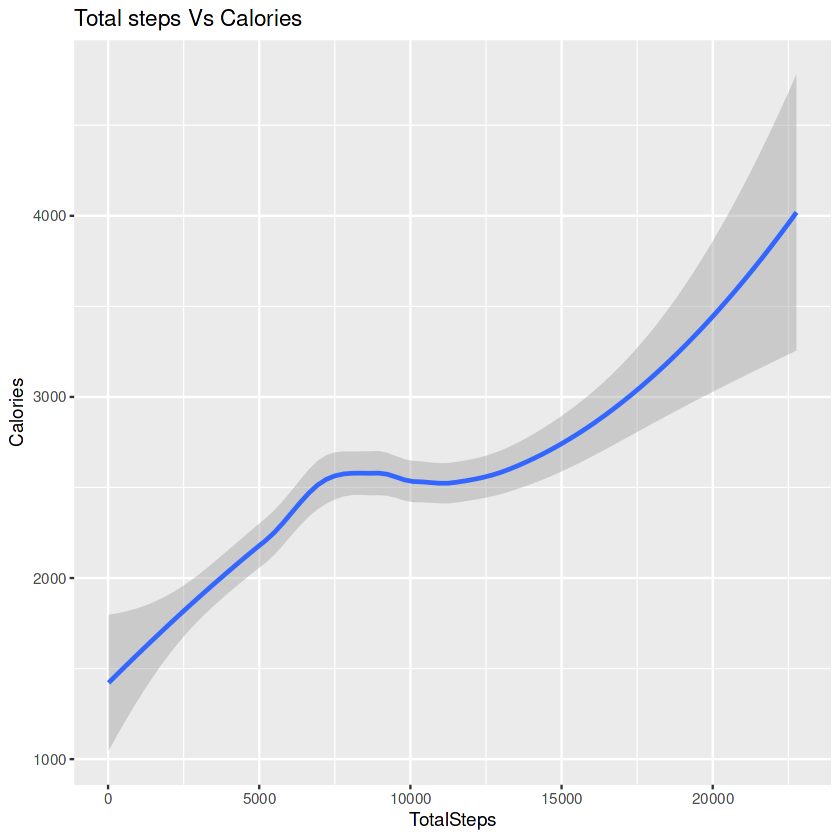

In [9]:
ordered_steps<-daily_activity_sleep %>% 
  arrange(TotalSteps)
ggplot(data=ordered_steps)+ geom_smooth(mapping = aes(x=TotalSteps, y=Calories), method = "loess", formula = y ~ x) + labs(title = "Total steps Vs Calories")


#### **2.Daily Steps and Sleep Duration**

**There is no clear relation observed between Total steps and Sleep time.**

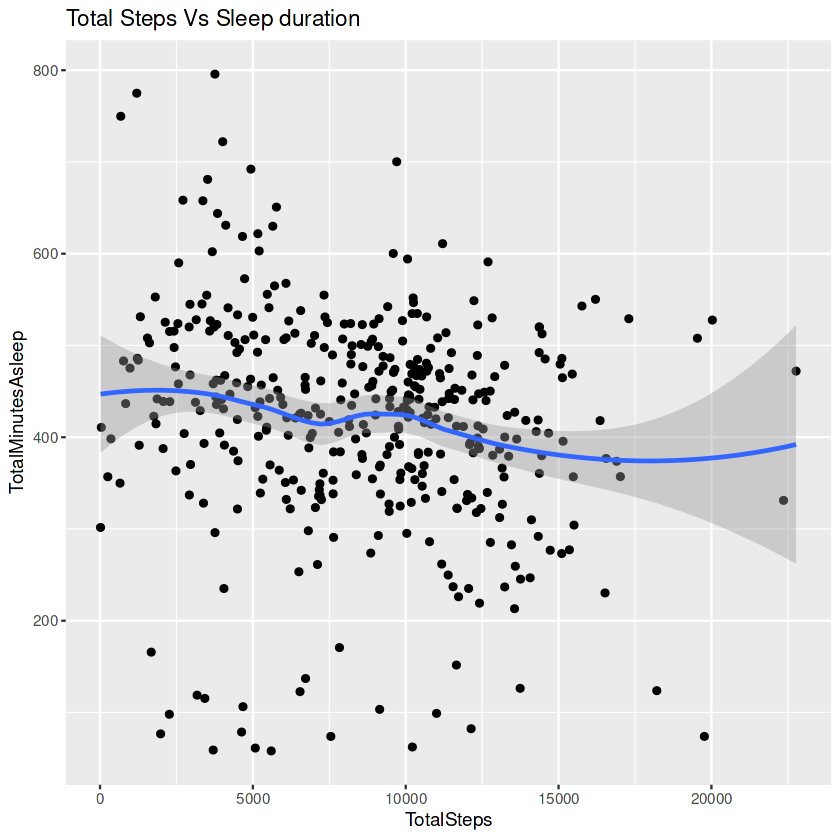

In [10]:
ggplot(data=ordered_steps)+ geom_jitter(mapping = aes(x=TotalSteps, y=TotalMinutesAsleep))+geom_smooth(mapping = aes(x=TotalSteps, y=TotalMinutesAsleep), method = "loess", formula = y ~ x) + labs(title = "Total Steps Vs Sleep duration")

#### **3.Sleep duration and sedentary minutes.**

**Sleep duration and Sedenatary minutes are inversely proportional to each other.**. Keep in mind that we need to support this insights with more data, because correlation between some data doesn’t mean causation.

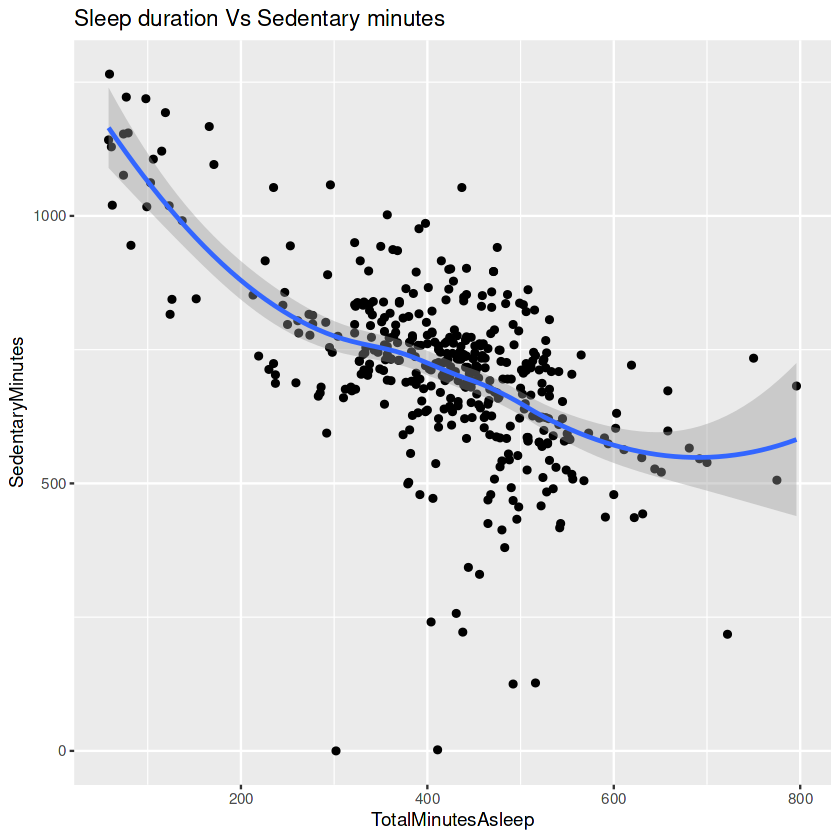

In [11]:
ordered_sleep<-daily_activity_sleep %>% 
  arrange(TotalMinutesAsleep)
ggplot(data=ordered_sleep) + geom_point(mapping = aes(x=TotalMinutesAsleep, y=SedentaryMinutes))+ geom_smooth(mapping = aes(x=TotalMinutesAsleep, y=SedentaryMinutes), method = "loess", formula = y ~ x) + labs(title = "Sleep duration Vs Sedentary minutes")

#### **4.Horly average intensity throughout the day**

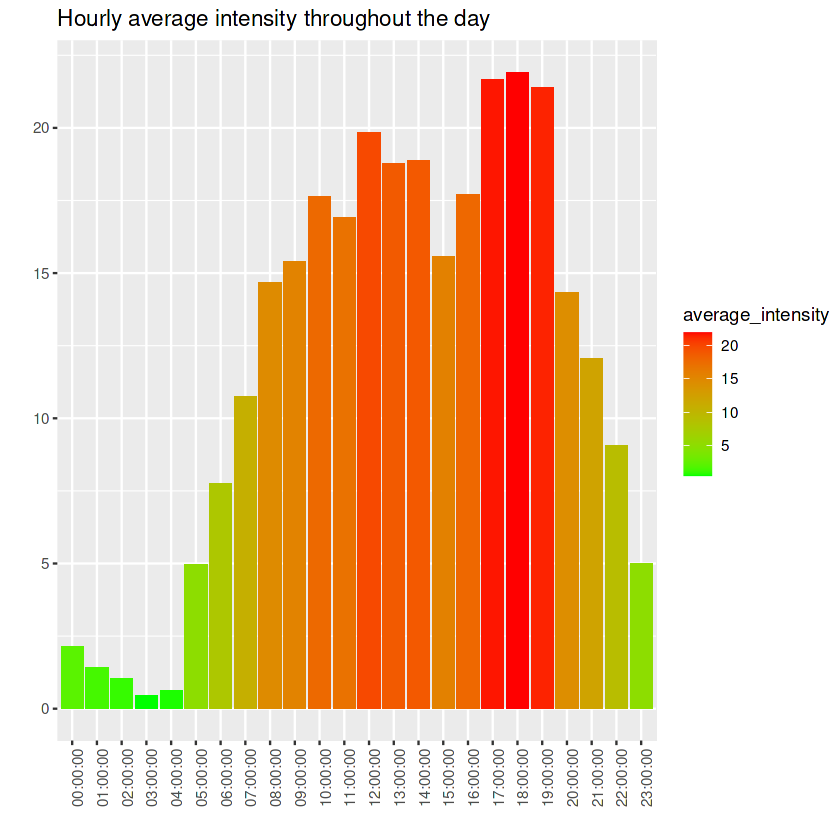

In [12]:
complete_hr_data %>%
  group_by(time) %>%
  summarize(average_intensity = mean(TotalIntensity)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_intensity, fill = average_intensity)) +
  labs(title = "Hourly average intensity throughout the day", x="", y="") + 
  scale_fill_gradient(low = "green", high = "red")+
  theme(axis.text.x = element_text(angle = 90))

**We can see that users are more active from 8 AM to 7 PAM, Most active between 5 PM TO 6 PM.**

#### **5.Hourly average steps throughout the day**

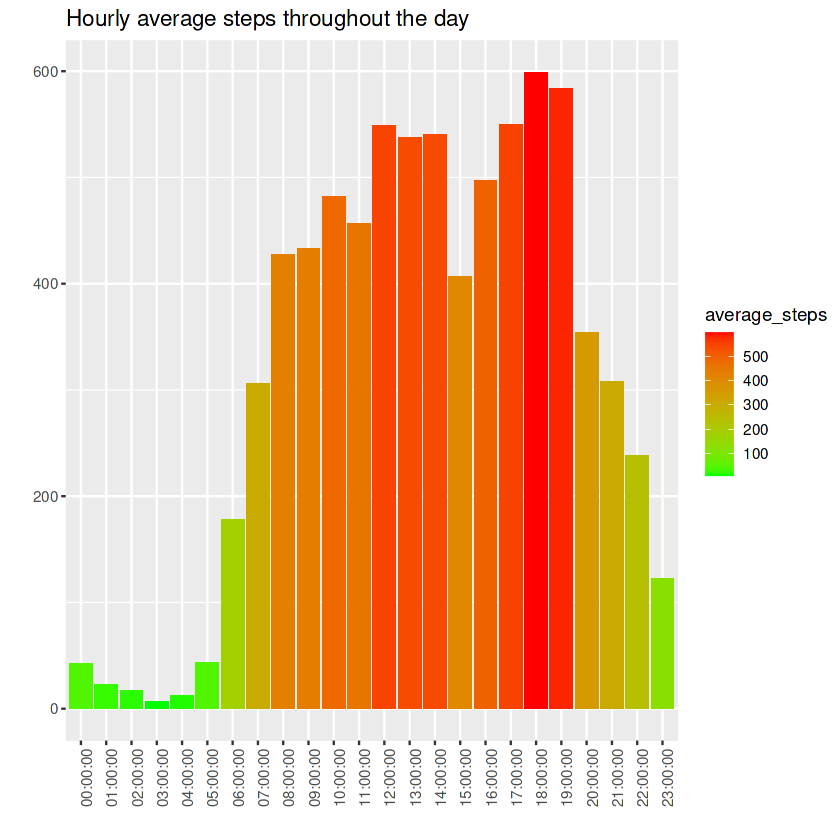

In [13]:
complete_hr_data %>%
  group_by(time) %>%
  summarize(average_steps = mean(StepTotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) +
  labs(title = "Hourly average steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "green", high = "red")+
  theme(axis.text.x = element_text(angle = 90))

**From the graph, it's evident that average intensity and average steps correlate closely. Users tend to walk more steps during lunchtime, from 12pm to 2pm, as well as in the evenings, from 5pm to 7pm.**

### **Conclusion**

Based on Fitbit data analysis Bellabeat can add following features in their application to improve the user experience.

**1.Setting Step goals**  
According to CDC research, achieving 8000 steps per day is linked with a 51% reduction in the risk of all-cause mortality. Therefore, the Bellabeat application ought to establish a daily steps goal for users and offer rewards points upon goal completion. Additionally, the **Bellabeat application should send notifications regarding step goals during peak activity times**, specifically from 12pm to 2pm and in the evenings from 5pm to 7pm, as these periods show heightened user activity.


**2.Notification to reduce sedentary time**  
Our analysis reveals a negative correlation between sleep duration and sedentary minutes. **To enhance user sleep quality, the Bellabeat application should send notifications to users if prolonged inactivity is detected.**
Moreover, our findings indicate that users typically sleep for less than 8 hours per day. **Implementing a feature where users can set a preferred bedtime and receive a notification minutes before could aid in preparing for sleep.**